In [4]:
import numpy as np
import pandas as pd

from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import torch
from torch import nn
from torch import optim
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, models
from torch.autograd import Variable
from torchvision.datasets import ImageFolder
import torch.utils.data as data
from torch.utils.data import DataLoader, TensorDataset

from torchsummary import summary

In [6]:
pip install torchsummary

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install tensorflow

  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1
Note: you may need to restart the kernel to use updated packages.


In [2]:
DEVICE = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(DEVICE)

cpu


In [2]:
#importing the necessary libraries
import tensorflow as tf
from tensorflow.keras import layers
from skimage.io import imshow
from pathlib import Path
import pandas as pd

# Input data files are available in the "../mura_unzipped/" directory.
# Running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("D:/codes/GAIP-NUS/MURA-v1.1/MURA-2"))

['train', 'train_image_paths.csv', 'train_labeled_studies.csv', 'valid', 'valid_image_paths.csv', 'valid_labeled_studies.csv']


In [8]:
pip install skimage

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [3 lines of output]
  
  *** Please install the `scikit-image` package (instead of `skimage`) ***
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
dataset_root = Path('D:/codes/GAIP-NUS/MURA-v1.1/MURA-2')

In [4]:
list(dataset_root.iterdir())

[WindowsPath('D:/codes/GAIP-NUS/MURA-v1.1/MURA-2/train'),
 WindowsPath('D:/codes/GAIP-NUS/MURA-v1.1/MURA-2/train_image_paths.csv'),
 WindowsPath('D:/codes/GAIP-NUS/MURA-v1.1/MURA-2/train_labeled_studies.csv'),
 WindowsPath('D:/codes/GAIP-NUS/MURA-v1.1/MURA-2/valid'),
 WindowsPath('D:/codes/GAIP-NUS/MURA-v1.1/MURA-2/valid_image_paths.csv'),
 WindowsPath('D:/codes/GAIP-NUS/MURA-v1.1/MURA-2/valid_labeled_studies.csv')]

In [5]:
#df is the generated dataframe whose head can be visualized below
df = pd.read_csv('D:/codes/GAIP-NUS/MURA-v1.1/MURA-2/train_image_paths.csv', header=None, names=['filename'])
df.head()

,filename
0,D:/codes/GAIP-NUS/MURA-v1.1/MURA-2/train/XR_SH...
1,D:/codes/GAIP-NUS/MURA-v1.1/MURA-2/train/XR_SH...
2,D:/codes/GAIP-NUS/MURA-v1.1/MURA-2/train/XR_SH...
3,D:/codes/GAIP-NUS/MURA-v1.1/MURA-2/train/XR_SH...
4,D:/codes/GAIP-NUS/MURA-v1.1/MURA-2/train/XR_SH...


In [6]:
#Adding class column to the dataframe with positive or negative label
#Classification is done on basis of the image names (postive/negative)
df['class'] = (df.filename.str.extract('study.*_(positive|negative)'))
df.head()

,filename,class
0,D:/codes/GAIP-NUS/MURA-v1.1/MURA-2/train/XR_SH...,positive
1,D:/codes/GAIP-NUS/MURA-v1.1/MURA-2/train/XR_SH...,positive
2,D:/codes/GAIP-NUS/MURA-v1.1/MURA-2/train/XR_SH...,positive
3,D:/codes/GAIP-NUS/MURA-v1.1/MURA-2/train/XR_SH...,positive
4,D:/codes/GAIP-NUS/MURA-v1.1/MURA-2/train/XR_SH...,positive


In [7]:
#A function to generate the dataframe for a csv file
def generate_df(csv_name):
    df = pd.read_csv(csv_name, header=None, names=['filename'])
    df['class'] = (df.filename
               .str.extract('study.*_(positive|negative)'))
    return df

In [8]:
list(dataset_root.iterdir())

[WindowsPath('D:/codes/GAIP-NUS/MURA-v1.1/MURA-2/train'),
 WindowsPath('D:/codes/GAIP-NUS/MURA-v1.1/MURA-2/train_image_paths.csv'),
 WindowsPath('D:/codes/GAIP-NUS/MURA-v1.1/MURA-2/train_labeled_studies.csv'),
 WindowsPath('D:/codes/GAIP-NUS/MURA-v1.1/MURA-2/valid'),
 WindowsPath('D:/codes/GAIP-NUS/MURA-v1.1/MURA-2/valid_image_paths.csv'),
 WindowsPath('D:/codes/GAIP-NUS/MURA-v1.1/MURA-2/valid_labeled_studies.csv')]

In [9]:
#Dividing the image data generated into train set and validation set
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1. / 255)
#Creating training set
train_gen = datagen.flow_from_dataframe(generate_df('D:/codes/GAIP-NUS/MURA-v1.1/MURA-2/train_image_paths.csv'),
                                        directory=dataset_root.parent,
                                        target_size=(224, 224),
                                        class_mode='binary')
#Creating validation set
valid_gen = datagen.flow_from_dataframe(generate_df('D:/codes/GAIP-NUS/MURA-v1.1/MURA-2/valid_image_paths.csv'),
                                        directory=dataset_root.parent,
                                        target_size=(224, 224),
                                        class_mode='binary')

Found 23237 validated image filenames belonging to 2 classes.
Found 1683 validated image filenames belonging to 2 classes.


In [10]:
#Downloading the densenet model pretrained on the imagenet dataset
densenet = tf.keras.applications.DenseNet169(weights='imagenet', include_top = False, input_shape=(224, 224, 3))


In [11]:
#Freezing the weights of the pretrained model
densenet.trainable = False

In [12]:
#Adding the Flatten layer and the sigmoid classification layer to the pretrained densenet model
model = tf.keras.models.Sequential([
    densenet,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 7, 7, 1664)        12642880  
                                                                 
 flatten (Flatten)           (None, 81536)             0         
                                                                 
 dense (Dense)               (None, 1)                 81537     
                                                                 
Total params: 12,724,417
Trainable params: 81,537
Non-trainable params: 12,642,880
_________________________________________________________________


In [14]:
#Compiling the model using adam optimizer
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [15]:
#Fitting the model on training test
history = model.fit_generator(train_gen, epochs=15, validation_data=valid_gen, use_multiprocessing=False)

C:\Users\tanay\AppData\Local\Temp\ipykernel_8244\3510587823.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_gen, epochs=15, validation_data=valid_gen, use_multiprocessing=False)


Epoch 1/15
727/727 [==============================] - 1315s 2s/step - loss: 1.1885 - accuracy: 0.6756 - val_loss: 1.1450 - val_accuracy: 0.6797
Epoch 2/15
727/727 [==============================] - 1355s 2s/step - loss: 1.0434 - accuracy: 0.7332 - val_loss: 1.2022 - val_accuracy: 0.6982
Epoch 3/15
727/727 [==============================] - 1472s 2s/step - loss: 0.9414 - accuracy: 0.7602 - val_loss: 1.3255 - val_accuracy: 0.6815
Epoch 4/15
727/727 [==============================] - 1561s 2s/step - loss: 0.9148 - accuracy: 0.7807 - val_loss: 1.7020 - val_accuracy: 0.6696
Epoch 5/15
727/727 [==============================] - 1441s 2s/step - loss: 0.8207 - accuracy: 0.7918 - val_loss: 1.5352 - val_accuracy: 0.6815
Epoch 6/15
727/727 [==============================] - 1401s 2s/step - loss: 0.7029 - accuracy: 0.8115 - val_loss: 1.5380 - val_accuracy: 0.6720
Epoch 7/15
727/727 [==============================] - 1446s 2s/step - loss: 0.6977 - accuracy: 0.8195 - val_loss: 1.7449 - val_accuracy:

In [16]:
#Saving the model weights
model.save("bonemodel.h5")
print("Saved model to disk")

Saved model to disk


In [17]:
# Loading the saved model

from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
model_new = load_model('bonemodel.h5')
model_new.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 7, 7, 1664)        12642880  
                                                                 
 flatten (Flatten)           (None, 81536)             0         
                                                                 
 dense (Dense)               (None, 1)                 81537     
                                                                 
Total params: 12,724,417
Trainable params: 81,537
Non-trainable params: 12,642,880
_________________________________________________________________


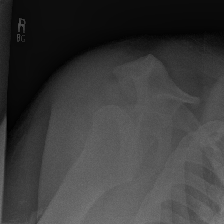

In [18]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model

img = tf.keras.utils.load_img("D:/codes/GAIP-NUS/image1.png", target_size=(224,224))
img

In [19]:
#convert image to array
input_img = tf.keras.utils.img_to_array(img)
input_img = np.expand_dims(input_img, axis=0)
input_img

array([[[[ 54.,  54.,  54.],
         [ 42.,  42.,  42.],
         [ 43.,  43.,  43.],
         ...,
         [ 11.,  11.,  11.],
         [ 11.,  11.,  11.],
         [ 11.,  11.,  11.]],

        [[ 42.,  42.,  42.],
         [ 38.,  38.,  38.],
         [ 41.,  41.,  41.],
         ...,
         [ 11.,  11.,  11.],
         [ 11.,  11.,  11.],
         [ 11.,  11.,  11.]],

        [[ 41.,  41.,  41.],
         [ 35.,  35.,  35.],
         [ 38.,  38.,  38.],
         ...,
         [ 11.,  11.,  11.],
         [ 11.,  11.,  11.],
         [ 11.,  11.,  11.]],

        ...,

        [[ 99.,  99.,  99.],
         [ 77.,  77.,  77.],
         [ 63.,  63.,  63.],
         ...,
         [116., 116., 116.],
         [114., 114., 114.],
         [120., 120., 120.]],

        [[103., 103., 103.],
         [ 78.,  78.,  78.],
         [ 64.,  64.,  64.],
         ...,
         [123., 123., 123.],
         [122., 122., 122.],
         [124., 124., 124.]],

        [[ 95.,  95.,  95.],
       

In [20]:
class_arr = ["No Fracture", "Fracture"]

#Predict the inputs on the model

predict_img = model.predict(input_img)
predict_img

max_value = max(list(predict_img))
a = list(max_value)
a
index = a.index(max_value)
print(class_arr[index])

1/1 [==============================] - 2s 2s/step
No Fracture


In [22]:
test_acc = model.evaluate(valid_gen)
print("The testing accuracy is: ", test_acc[1]*100, "%")

53/53 [==============================] - 95s 2s/step - loss: 2.1638 - accuracy: 0.6803
The testing accuracy is:  68.03327202796936 %


In [ ]:
df = pd.DataFrame(history.history)
df = df.astype(float)
df.plot()

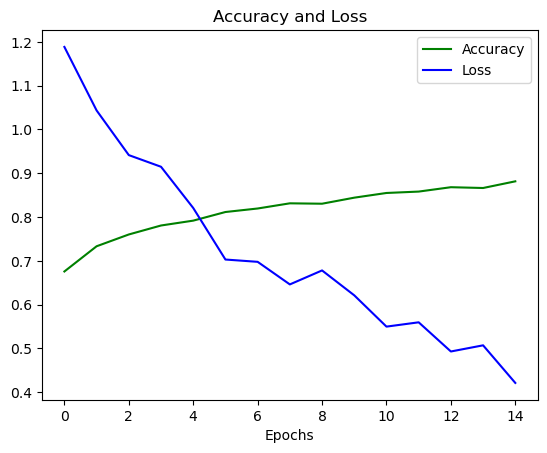

In [40]:
loss_train = history.history['accuracy']
loss_val = history.history['loss']
epochs = range(0,15)
plt.plot(epochs, loss_train, 'g', label='Accuracy')
plt.plot(epochs, loss_val, 'b', label='Loss')
plt.title('Accuracy and Loss')
plt.xlabel('Epochs')
plt.ylabel('')
plt.legend()
plt.show()

In [2]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
model_new = load_model('bonemodel.h5')
model_new.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 7, 7, 1664)        12642880  
                                                                 
 flatten (Flatten)           (None, 81536)             0         
                                                                 
 dense (Dense)               (None, 1)                 81537     
                                                                 
Total params: 12,724,417
Trainable params: 81,537
Non-trainable params: 12,642,880
_________________________________________________________________


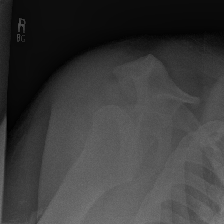

In [6]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#importing the necessary libraries
import tensorflow as tf
from tensorflow.keras import layers
from skimage.io import imshow
from pathlib import Path
import pandas as pd

img = tf.keras.utils.load_img("D:/codes/GAIP-NUS/image1.png", target_size=(224,224))
img

In [7]:
#convert image to array
input_img = tf.keras.utils.img_to_array(img)
input_img = np.expand_dims(input_img, axis=0)
input_img

array([[[[ 54.,  54.,  54.],
         [ 42.,  42.,  42.],
         [ 43.,  43.,  43.],
         ...,
         [ 11.,  11.,  11.],
         [ 11.,  11.,  11.],
         [ 11.,  11.,  11.]],

        [[ 42.,  42.,  42.],
         [ 38.,  38.,  38.],
         [ 41.,  41.,  41.],
         ...,
         [ 11.,  11.,  11.],
         [ 11.,  11.,  11.],
         [ 11.,  11.,  11.]],

        [[ 41.,  41.,  41.],
         [ 35.,  35.,  35.],
         [ 38.,  38.,  38.],
         ...,
         [ 11.,  11.,  11.],
         [ 11.,  11.,  11.],
         [ 11.,  11.,  11.]],

        ...,

        [[ 99.,  99.,  99.],
         [ 77.,  77.,  77.],
         [ 63.,  63.,  63.],
         ...,
         [116., 116., 116.],
         [114., 114., 114.],
         [120., 120., 120.]],

        [[103., 103., 103.],
         [ 78.,  78.,  78.],
         [ 64.,  64.,  64.],
         ...,
         [123., 123., 123.],
         [122., 122., 122.],
         [124., 124., 124.]],

        [[ 95.,  95.,  95.],
       

In [9]:
class_arr = ["No Fracture", "Fracture"]

#Predict the inputs on the model

predict_img = model_new.predict(input_img)
predict_img

max_value = max(list(predict_img))
a = list(max_value)
a
index = a.index(max_value)
print(class_arr[index])

1/1 [==============================] - 2s 2s/step
No Fracture
